<a href="https://colab.research.google.com/github/NicoloAvesani/project/blob/main/project_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__NICOLO' AVESANI VR490189 PROGRAMMING FINAL PROJECT 2022-2023__

I'm Nicolò Avesani, Data Science student in Verona. 
My project is focused on a dataset called 'Touristic Residences in Veneto'.

The dataset has 8504 rows and 45 columns, describing all the main characteristics of the touristic residences in Veneto (Italy), suh as the presence of: private pool, restaurant, private parking spots, staff ready to speak in several languages.

Structures are divided in 7 Districts, the so-called 'Provincie', which are: Belluno, Padova, Rovigo, Treviso, Venezia, Verona, Vicenza. The analysis of the geographical location of the residenes will help understanding some results.

The aim of my project is to find out if there is a positive correlation between the main descriptive variables and the classification of the touristic residences.

1 __Data Exploration + Data Wrangling__

Completing this part without any issues guarantees passing the class. This part is worth: 20 points.
1. Explore the dataset (6 points): Your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis.

2. Clean up the dataset (6 points) This step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the considerations matured during the exploration.

3. Show some interesting plots (6 points) An essential skill of a data scientist is being able to show the important information by using easily un- derstandable graphs. Use the libraries introduced in class to showcase some interesting aspects of the dataset.

An additional 2 points can be awarded for code cleanliness (hence the total being 20 points instead of 18).

In [1]:
## 1 EXPLORE THE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

## import dataset with pandas 

tourism_structures_df = pd.read_csv('https://www.veneto.eu/static/opendata/dove-alloggiare.csv')


In [2]:
tourism_structures_df

,PROVINCIA,COMUNE,LOCALITA,TIPOLOGIA,TIPOLOGIA SECONDARIA,DENOMINAZIONE,INDIRIZZO,NUMERO CIVICO,INTERNO,CAP,...,PERIFERIA,COLLINARE,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,CODICE IDENTIFICATIVO,DATA ULTIMA MODIFICA,CLASSIFICAZIONE
0,BELLUNO,AGORDO,NaN,AGRITURISMO,NaN,CASA BIANCA DI CHIERZI SANTINA,Via Nagol,24,NaN,32021.0,...,Falso,Falso,Falso,Falso,Falso,Falso,Falso,44981,01/03/2021,NaN
1,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,ERICE,Via IV Novembre 1918,13/B,NaN,32021.0,...,Falso,Falso,Vero,Falso,Vero,Falso,Falso,3886,02/02/2021,3 ***
2,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,PENSIONE DUE ANGELI,Via Carrera,4,NaN,32021.0,...,Falso,Falso,Vero,Falso,Falso,Falso,Falso,3888,20/09/2021,1 *
3,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,VILLA IMPERINA,Via Pragrande,5,NaN,32021.0,...,Falso,Falso,Vero,Vero,Vero,Vero,Falso,3885,25/06/2020,3 ***
4,BELLUNO,AGORDO,NaN,BED AND BREAKFAST,NaN,B&B VILLA BELVEDERE - (temp. chiusa),via Belvedere,1,NaN,32021.0,...,Falso,Falso,Vero,Falso,Falso,Falso,Vero,289884,11/10/2021,4 Leoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,VICENZA,ZUGLIANO,NaN,AGRITURISMO,NaN,BORGHETTO SAN BIAGIO,VIA SAN BIAGIO,7 - Grumolo Pedemonte,NaN,36030.0,...,Falso,Falso,Falso,Falso,Falso,Falso,Falso,349511,22/02/2021,NaN
8500,VICENZA,ZUGLIANO,NaN,AGRITURISMO,NaN,MARINEA,TOVARI,13,NaN,36030.0,...,Falso,Falso,Falso,Falso,Falso,Falso,Falso,199281,26/07/2017,NaN
8501,VICENZA,ZUGLIANO,NaN,ALBERGO,Albergo,CUNICO,Via Marconi,40,NaN,36030.0,...,Falso,Falso,Vero,Falso,Falso,Falso,Falso,3884,16/07/2019,1 *
8502,VICENZA,ZUGLIANO,NaN,BED AND BREAKFAST,NaN,B&B DALLA COSTA EDWARD,Via Roma,61/B,NaN,36030.0,...,Falso,Falso,Falso,Falso,Falso,Falso,Falso,99244,17/11/2020,2 Leoni


In [3]:
## Since the majority of data are string values, so I need to transform them into boolean values with 1 for True(Vero) and 0 for False (Falso)

for i in range(len(tourism_structures_df)):
  for j in tourism_structures_df.columns:
    if (tourism_structures_df[j][i] == 'Vero') | (tourism_structures_df[j][i] == 'Falso'):
      tourism_structures_df[j] = tourism_structures_df[j].map({'Vero':1,'Falso':0}) 

In [4]:
tourism_structures_df

,PROVINCIA,COMUNE,LOCALITA,TIPOLOGIA,TIPOLOGIA SECONDARIA,DENOMINAZIONE,INDIRIZZO,NUMERO CIVICO,INTERNO,CAP,...,PERIFERIA,COLLINARE,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,CODICE IDENTIFICATIVO,DATA ULTIMA MODIFICA,CLASSIFICAZIONE
0,BELLUNO,AGORDO,NaN,AGRITURISMO,NaN,CASA BIANCA DI CHIERZI SANTINA,Via Nagol,24,NaN,32021.0,...,0,0,0,0,0,0,0,44981,01/03/2021,NaN
1,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,ERICE,Via IV Novembre 1918,13/B,NaN,32021.0,...,0,0,1,0,1,0,0,3886,02/02/2021,3 ***
2,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,PENSIONE DUE ANGELI,Via Carrera,4,NaN,32021.0,...,0,0,1,0,0,0,0,3888,20/09/2021,1 *
3,BELLUNO,AGORDO,NaN,ALBERGO,Albergo,VILLA IMPERINA,Via Pragrande,5,NaN,32021.0,...,0,0,1,1,1,1,0,3885,25/06/2020,3 ***
4,BELLUNO,AGORDO,NaN,BED AND BREAKFAST,NaN,B&B VILLA BELVEDERE - (temp. chiusa),via Belvedere,1,NaN,32021.0,...,0,0,1,0,0,0,1,289884,11/10/2021,4 Leoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,VICENZA,ZUGLIANO,NaN,AGRITURISMO,NaN,BORGHETTO SAN BIAGIO,VIA SAN BIAGIO,7 - Grumolo Pedemonte,NaN,36030.0,...,0,0,0,0,0,0,0,349511,22/02/2021,NaN
8500,VICENZA,ZUGLIANO,NaN,AGRITURISMO,NaN,MARINEA,TOVARI,13,NaN,36030.0,...,0,0,0,0,0,0,0,199281,26/07/2017,NaN
8501,VICENZA,ZUGLIANO,NaN,ALBERGO,Albergo,CUNICO,Via Marconi,40,NaN,36030.0,...,0,0,1,0,0,0,0,3884,16/07/2019,1 *
8502,VICENZA,ZUGLIANO,NaN,BED AND BREAKFAST,NaN,B&B DALLA COSTA EDWARD,Via Roma,61/B,NaN,36030.0,...,0,0,0,0,0,0,0,99244,17/11/2020,2 Leoni


In [5]:
## i want to see the informations of the dataset

tourism_structures_df.info()

## as i can see, the dataset has a total of 8504 entries and 45 clolumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8504 entries, 0 to 8503
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROVINCIA              8504 non-null   object 
 1   COMUNE                 8504 non-null   object 
 2   LOCALITA               1573 non-null   object 
 3   TIPOLOGIA              8504 non-null   object 
 4   TIPOLOGIA SECONDARIA   3695 non-null   object 
 5   DENOMINAZIONE          8504 non-null   object 
 6   INDIRIZZO              8486 non-null   object 
 7   NUMERO CIVICO          8162 non-null   object 
 8   INTERNO                289 non-null    object 
 9   CAP                    8471 non-null   float64
 10  TELEFONO               8415 non-null   object 
 11  FAX                    5010 non-null   object 
 12  EMAIL                  8473 non-null   object 
 13  SITO WEB               5725 non-null   object 
 14  ZONA                   8504 non-null   object 
 15  PISC

In [6]:
tourism_structures_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CAP,8471.0,33682.239995,3549.474183,0.0,30124.00,32043.0,37012.00,45100.0
PISCINA,8504.0,0.135113,0.341864,0.0,0.00,0.0,0.00,1.0
PISCINA COPERTA,8504.0,0.026341,0.160155,0.0,0.00,0.0,0.00,1.0
RISTORANTE,8504.0,0.314911,0.464508,0.0,0.00,0.0,1.00,1.0
PARCHEGGIO,8504.0,0.600423,0.489840,0.0,0.00,1.0,1.00,1.0
SALA CONFERENZE,8504.0,0.000823,0.028680,0.0,0.00,0.0,0.00,1.0
ARIA CONDIZIONATA,8504.0,0.556797,0.496793,0.0,0.00,1.0,1.00,1.0
GIOCHI BIMBI,8504.0,0.182973,0.386667,0.0,0.00,0.0,0.00,1.0
SAUNA,8504.0,0.063617,0.244084,0.0,0.00,0.0,0.00,1.0
SOLARIUM,8504.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [7]:
tourism_structures_df.groupby(['PROVINCIA']).mean()

,CAP,PISCINA,PISCINA COPERTA,RISTORANTE,PARCHEGGIO,SALA CONFERENZE,ARIA CONDIZIONATA,GIOCHI BIMBI,SAUNA,SOLARIUM,...,MARE,TERMALE,PERIFERIA,COLLINARE,INGLESE,FRANCESE,TEDESCO,SPAGNOLO,CHIUSURA TEMPORANEA,CODICE IDENTIFICATIVO
PROVINCIA,,,,,,,,,,,,,,,,,,,,,
BELLUNO,32034.030876,0.036453,0.031527,0.433498,0.673892,0.000000,0.047291,0.269951,0.147783,0.0,...,0.000000,0.012808,0.070936,0.087685,0.666010,0.317241,0.491626,0.134975,0.065025,57083.595074
PADOVA,35045.427720,0.169896,0.132638,0.332340,0.700447,0.001490,0.660209,0.128167,0.137109,0.0,...,0.000000,0.210134,0.149031,0.104322,0.675112,0.491803,0.312966,0.235469,0.031297,62496.064083
ROVIGO,45027.331858,0.070796,0.000000,0.287611,0.699115,0.004425,0.601770,0.168142,0.013274,0.0,...,0.132743,0.000000,0.119469,0.000000,0.561947,0.376106,0.221239,0.106195,0.026549,79834.982301
TREVISO,31039.671196,0.055556,0.010840,0.223577,0.640921,0.001355,0.508130,0.132791,0.042005,0.0,...,0.000000,0.000000,0.121951,0.220867,0.617886,0.369919,0.247967,0.200542,0.023035,63987.485095
VENEZIA,30048.645258,0.169271,0.010417,0.336310,0.521949,0.000744,0.807292,0.198661,0.040179,0.0,...,0.360863,0.005208,0.043899,0.000000,0.796503,0.597098,0.545387,0.383185,0.160342,68618.610491
VERONA,37044.629645,0.189504,0.023324,0.257393,0.597668,0.000416,0.523115,0.171179,0.049563,0.0,...,0.000416,0.022074,0.138692,0.177426,0.653061,0.326531,0.450646,0.170762,0.056643,79062.415660
VICENZA,36046.085414,0.040523,0.014379,0.343791,0.631373,0.001307,0.401307,0.150327,0.049673,0.0,...,0.000000,0.010458,0.150327,0.200000,0.661438,0.341176,0.196078,0.171242,0.037908,75500.772549


In [8]:
## create a copy of the original dataframe in order to drop some problematic and useless columns that I will not use in my analysis.
## 'Problematic' since they have null values.

## The dropped columns are: LOCATION, SECONDARY TYPE, ADDRESS, HOUSE NUMBER, INTERNAL, ZIP CODE, PHONE, FAX, EMAIL ADDRESS, WEBSITE, AREA, LAST EDIT, IDENTIFICATION CODE.
## These columns provide useless information, since they concern only the single residential facility, and are linked to contact information. 
## The columns I am interested in are those which provide me information about the presence or not of descriptive characteristics of the touristic residences

## I also drop the following columns that, even if they provide information about descriptive characteristics, are not relevant for my purposes:
## INDOOR SWIMMING POOL, CONFERENCE ROOM, SOLARIUM, OUTSKIRTS, HILLS

tourism_df = tourism_structures_df.copy()

tourism_df = tourism_df.drop(tourism_df.columns[[2,4,6,7,8,9,10,11,12,13,14,16,19,23,35,36,42,43]],axis=1)

tourism_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8504 entries, 0 to 8503
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROVINCIA             8504 non-null   object
 1   COMUNE                8504 non-null   object
 2   TIPOLOGIA             8504 non-null   object
 3   DENOMINAZIONE         8504 non-null   object
 4   PISCINA               8504 non-null   int64 
 5   RISTORANTE            8504 non-null   int64 
 6   PARCHEGGIO            8504 non-null   int64 
 7   ARIA CONDIZIONATA     8504 non-null   int64 
 8   GIOCHI BIMBI          8504 non-null   int64 
 9   SAUNA                 8504 non-null   int64 
 10  FITNESS               8504 non-null   int64 
 11  ANIMALI AMMESSI       8504 non-null   int64 
 12  CENTRO STORICO        8504 non-null   int64 
 13  ZONA FIERA            8504 non-null   int64 
 14  LAGO                  8504 non-null   int64 
 15  AEROPORTO             8504 non-null   

In [9]:
tourism_groupby_mean = tourism_df.groupby(['PROVINCIA']).mean()

In [10]:
tourism_groupby_mean['INGLESE']

PROVINCIA
BELLUNO    0.666010
PADOVA     0.675112
ROVIGO     0.561947
TREVISO    0.617886
VENEZIA    0.796503
VERONA     0.653061
VICENZA    0.661438
Name: INGLESE, dtype: float64

In [11]:
tourism_groupby_mean.index

Index(['BELLUNO', 'PADOVA', 'ROVIGO', 'TREVISO', 'VENEZIA', 'VERONA',
       'VICENZA'],
      dtype='object', name='PROVINCIA')

In [12]:
## I want to have the classification column fill with integer values, and drop the Nan values.

classification_nan_mask = tourism_df['CLASSIFICAZIONE'].isnull()
tourism_clear_class_df = tourism_df[classification_nan_mask == False]

new_indexes = []
for i in range(len(tourism_clear_class_df)):
    new_indexes.append(i)

tourism_clear_class_df.index = new_indexes


In [13]:
np.sort(tourism_clear_class_df['CLASSIFICAZIONE'].unique())

array(['1 *', '2 **', '2 Leoni', '3 ***', '3 *** SUPERIOR', '3 Leoni',
       '4 ****', '4 **** SUPERIOR', '4 Leoni', '5 *****', '5 ***** lusso',
       '5 Leoni'], dtype=object)

In [ ]:
## I create new columns relative to different class of touristic residences


class_1 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '1 *':
    class_1.append(1)
  else:
    class_1.append(0)

tourism_clear_class_df['CLASS 1'] = class_1


class_2 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 **':
    class_2.append(1)
  else:
    class_2.append(0)

tourism_clear_class_df['CLASS 2'] = class_2

class_2_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 Leoni':
    class_2_Leoni.append(1)
  else:
    class_2_Leoni.append(0)

tourism_clear_class_df['CLASS 2 Leoni'] = class_2_Leoni

class_3 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 ***' :
    class_3.append(1)
  else:
    class_3.append(0)

tourism_clear_class_df['CLASS 3'] = class_3

class_3_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 Leoni' :
    class_3_Leoni.append(1)
  else:
    class_3_Leoni.append(0)

tourism_clear_class_df['CLASS 3 Leoni'] = class_3_Leoni

class_3_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 *** SUPERIOR' :
    class_3_sup.append(1)
  else:
    class_3_sup.append(0)

tourism_clear_class_df['CLASS 3 SUPERIOR'] = class_3_sup

class_4 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 ****':
    class_4.append(1)
  else:
    class_4.append(0)

tourism_clear_class_df['CLASS 4'] = class_4

class_4_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 Leoni' :
    class_4_Leoni.append(1)
  else:
    class_4_Leoni.append(0)

tourism_clear_class_df['CLASS 4 Leoni'] = class_4_Leoni

class_4_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 **** SUPERIOR' :
    class_4_sup.append(1)
  else:
    class_4_sup.append(0)

tourism_clear_class_df['CLASS 4 SUPERIOR'] = class_4_sup

class_5 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 *****':
    class_5.append(1)
  else:
    class_5.append(0)

tourism_clear_class_df['CLASS 5'] = class_5

class_5_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 Leoni':
    class_5_Leoni.append(1)
  else:
    class_5_Leoni.append(0)

tourism_clear_class_df['CLASS 5 Leoni'] = class_5_Leoni

class_5_luxury = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 ***** lusso':
    class_5_luxury.append(1)
  else:
    class_5_luxury.append(0)

tourism_clear_class_df['CLASS 5 LUXURY'] = class_5_luxury


## I also create an all lenguages column in which I will have 1 if the touristic residence speak all 4 lenguages

languages = []

for i in range(len(tourism_clear_class_df)):
    if (tourism_clear_class_df.loc[i, 'INGLESE'] == 1) & (tourism_clear_class_df.loc[i, 'TEDESCO'] == 1) & (tourism_clear_class_df.loc[i, 'FRANCESE'] == 1) & (tourism_clear_class_df.loc[i, 'SPAGNOLO'] == 1):
        languages.append(1)
    else:
        languages.append(0)

tourism_clear_class_df['LANGUAGES'] = languages

In [15]:
tourism_clear_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7337 entries, 0 to 7336
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROVINCIA             7337 non-null   object
 1   COMUNE                7337 non-null   object
 2   TIPOLOGIA             7337 non-null   object
 3   DENOMINAZIONE         7337 non-null   object
 4   PISCINA               7337 non-null   int64 
 5   RISTORANTE            7337 non-null   int64 
 6   PARCHEGGIO            7337 non-null   int64 
 7   ARIA CONDIZIONATA     7337 non-null   int64 
 8   GIOCHI BIMBI          7337 non-null   int64 
 9   SAUNA                 7337 non-null   int64 
 10  FITNESS               7337 non-null   int64 
 11  ANIMALI AMMESSI       7337 non-null   int64 
 12  CENTRO STORICO        7337 non-null   int64 
 13  ZONA FIERA            7337 non-null   int64 
 14  LAGO                  7337 non-null   int64 
 15  AEROPORTO             7337 non-null   

In [16]:
tourism_clear_class_df

,PROVINCIA,COMUNE,TIPOLOGIA,DENOMINAZIONE,PISCINA,RISTORANTE,PARCHEGGIO,ARIA CONDIZIONATA,GIOCHI BIMBI,SAUNA,...,CLASS 3,CLASS 3 Leoni,CLASS 3 SUPERIOR,CLASS 4,CLASS 4 Leoni,CLASS 4 SUPERIOR,CLASS 5,CLASS 5 Leoni,CLASS 5 LUXURY,LANGUAGES
0,BELLUNO,AGORDO,ALBERGO,ERICE,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,BELLUNO,AGORDO,ALBERGO,PENSIONE DUE ANGELI,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BELLUNO,AGORDO,ALBERGO,VILLA IMPERINA,0,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,BELLUNO,AGORDO,BED AND BREAKFAST,B&B VILLA BELVEDERE - (temp. chiusa),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,BELLUNO,AGORDO,BED AND BREAKFAST,BED & BREAKFAST SOL FIORI',0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,VICENZA,ZOVENCEDO,CAMERE,PICCOLO MONDO,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7333,VICENZA,ZOVENCEDO,CAMERE,VILLA BONIN,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7334,VICENZA,ZUGLIANO,ALBERGO,CUNICO,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7335,VICENZA,ZUGLIANO,BED AND BREAKFAST,B&B DALLA COSTA EDWARD,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
tourism_clear_class_groupby_mean = tourism_clear_class_df.groupby(['PROVINCIA']).mean()
tourism_clear_class_groupby_mean.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,0.044848,0.202532,0.089888,0.073874,0.177043,0.223814,0.049051
RISTORANTE,0.404848,0.403255,0.365169,0.288288,0.351751,0.296937,0.389241
PARCHEGGIO,0.829091,0.844485,0.887640,0.852252,0.545914,0.708004,0.762658
ARIA CONDIZIONATA,0.058182,0.793852,0.764045,0.675676,0.844358,0.619565,0.484177
GIOCHI BIMBI,0.303030,0.153707,0.213483,0.172973,0.207782,0.202075,0.177215
SAUNA,0.181818,0.166365,0.016854,0.055856,0.042023,0.057806,0.060127
FITNESS,0.058182,0.166365,0.044944,0.045045,0.060311,0.057806,0.042722
ANIMALI AMMESSI,0.476364,0.542495,0.601124,0.481081,0.539689,0.387352,0.479430
CENTRO STORICO,0.271515,0.245931,0.286517,0.221622,0.445136,0.269269,0.270570
ZONA FIERA,0.008485,0.050633,0.005618,0.009009,0.003502,0.041502,0.044304


In [18]:
tourism_clear_class_groupby_mean['INGLESE']

PROVINCIA
BELLUNO    0.734545
PADOVA     0.815552
ROVIGO     0.713483
TREVISO    0.816216
VENEZIA    0.833074
VERONA     0.768281
VICENZA    0.772152
Name: INGLESE, dtype: float64

In [19]:
tourism_clear_class_groupby_mean['CLASS 2 Leoni']

PROVINCIA
BELLUNO    0.290909
PADOVA     0.256781
ROVIGO     0.275281
TREVISO    0.342342
VENEZIA    0.234630
VERONA     0.326581
VICENZA    0.295886
Name: CLASS 2 Leoni, dtype: float64

In [20]:
## Now I can understand how many touristic residences per provincia has the characteristics in index

tourism_clear_class_groupby_sum = tourism_clear_class_df.groupby(['PROVINCIA']).sum()

tourism_clear_class_groupby_sum.T

PROVINCIA,BELLUNO,PADOVA,ROVIGO,TREVISO,VENEZIA,VERONA,VICENZA
PISCINA,37,112,16,41,455,453,31
RISTORANTE,334,223,65,160,904,601,246
PARCHEGGIO,684,467,158,473,1403,1433,482
ARIA CONDIZIONATA,48,439,136,375,2170,1254,306
GIOCHI BIMBI,250,85,38,96,534,409,112
SAUNA,150,92,3,31,108,117,38
FITNESS,48,92,8,25,155,117,27
ANIMALI AMMESSI,393,300,107,267,1387,784,303
CENTRO STORICO,224,136,51,123,1144,545,171
ZONA FIERA,7,28,1,5,9,84,28


In [21]:
## I create masks and df for every provincia

belluno_mask = tourism_clear_class_df['PROVINCIA'] == 'BELLUNO'
belluno_df = tourism_clear_class_df[belluno_mask]

padova_mask = tourism_clear_class_df['PROVINCIA'] == 'PADOVA'
padova_df = tourism_clear_class_df[padova_mask]

rovigo_mask = tourism_clear_class_df['PROVINCIA'] == 'ROVIGO'
rovigo_df = tourism_clear_class_df[rovigo_mask]

treviso_mask = tourism_clear_class_df['PROVINCIA'] == 'TREVISO'
treviso_df = tourism_clear_class_df[treviso_mask]

venezia_mask = tourism_clear_class_df['PROVINCIA'] == 'VENEZIA'
venezia_df = tourism_clear_class_df[venezia_mask]

verona_mask = tourism_clear_class_df['PROVINCIA'] == 'VERONA'
verona_df = tourism_clear_class_df[verona_mask]

vicenza_mask = tourism_clear_class_df['PROVINCIA'] == 'VICENZA'
vicenza_df = tourism_clear_class_df[vicenza_mask]

In [22]:
## length of the dfs that I have just created gives me the number of touristic residences per provincia

belluno_tr = len(belluno_df)

padova_tr = len(padova_df)

treviso_tr = len(treviso_df)

rovigo_tr = len(rovigo_df)

venezia_tr = len(venezia_df)

verona_tr = len(verona_df)

vicenza_tr = len(vicenza_df)

city_len = [belluno_tr , padova_tr, treviso_tr, rovigo_tr, venezia_tr, verona_tr, vicenza_tr]

In [23]:
## verify that there is no mistakes

len(tourism_clear_class_df) == belluno_tr + padova_tr + treviso_tr + rovigo_tr + venezia_tr + verona_tr + vicenza_tr

True

In [24]:
## descriptive data

belluno_descriptive = tourism_clear_class_groupby_sum.T['BELLUNO']
padova_descriptive = tourism_clear_class_groupby_sum.T['PADOVA']
treviso_descriptive = tourism_clear_class_groupby_sum.T['TREVISO']
rovigo_descriptive = tourism_clear_class_groupby_sum.T['ROVIGO']
venezia_descriptive = tourism_clear_class_groupby_sum.T['VENEZIA']
verona_descriptive = tourism_clear_class_groupby_sum.T['VERONA']
vicenza_descriptive = tourism_clear_class_groupby_sum.T['VICENZA']

city_list = [belluno_descriptive, padova_descriptive, treviso_descriptive, rovigo_descriptive, venezia_descriptive, verona_descriptive, vicenza_descriptive]


In [206]:
city_len

[825, 553, 555, 178, 2570, 2024, 632]

What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)verona
Digit 1 if you want to analyze another provincia, 0 otherwise0


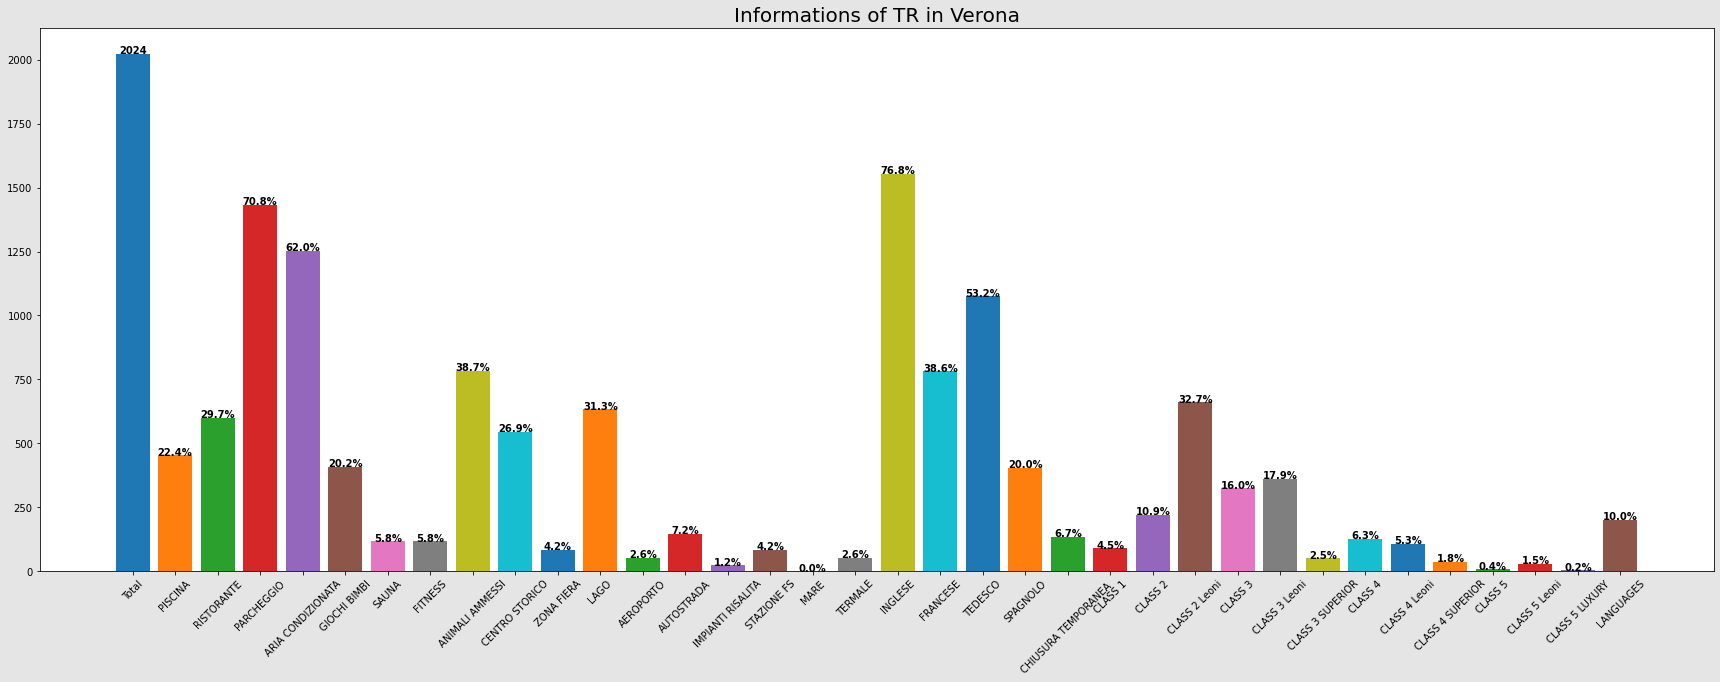

In [216]:
## touristic residences with every characteristic and percentage per provincia function

provincie = [
    'BELLUNO',
    'PADOVA',
    'TREVISO',
    'ROVIGO',
    'VENEZIA',
    'VERONA',
    'VICENZA'
]

plt.figure(figsize=(30,10))
j=1

while j != 0:

  city = input('What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)').upper()

  if city == 'BELLUNO':
    plt.title('Informations of TR in Belluno', fontsize= 20)
    plt.bar('Total', city_len[0])
    plt.text('Total',city_len[0], str(city_len[0]), ha='center', weight='bold')
    for i in range(len(belluno_descriptive)):
      plt.bar(belluno_descriptive.index[i], belluno_descriptive[i])
      plt.xticks(rotation=45)
      number = round((belluno_descriptive[i]/belluno_tr)*100,1)
      plt.text(belluno_descriptive.index[i], belluno_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

  elif city == 'PADOVA':
    plt.title('Informations of TR in Padova', fontsize= 20)
    plt.bar('Total', city_len[1])
    plt.text('Total',city_len[1], str(city_len[1]), ha='center', weight='bold')
    for i in range(len(padova_descriptive)):
      plt.bar(padova_descriptive.index[i], padova_descriptive[i])
      plt.xticks(rotation=45)
      number = round((padova_descriptive[i]/padova_tr)*100,1)
      plt.text(padova_descriptive.index[i], padova_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

  elif city == 'TREVISO':
    plt.title('Informations of TR in Treviso', fontsize= 20)
    plt.bar('Total', city_len[2])
    plt.text('Total',city_len[2], str(city_len[2]), ha='center', weight='bold')
    for i in range(len(treviso_descriptive)):
      plt.bar(treviso_descriptive.index[i], treviso_descriptive[i])
      plt.xticks(rotation=45)
      number = round((treviso_descriptive[i]/treviso_tr)*100,1)
      plt.text(treviso_descriptive.index[i], treviso_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  
    
  elif city == 'ROVIGO':
    plt.title('Informations of TR in Rovigo', fontsize= 20)
    plt.bar('Total', city_len[3])
    plt.text('Total',city_len[3], str(city_len[3]), ha='center', weight='bold')
    for i in range(len(rovigo_descriptive)):
      plt.bar(rovigo_descriptive.index[i], rovigo_descriptive[i])
      plt.xticks(rotation=45)
      number = round((rovigo_descriptive[i]/rovigo_tr)*100,1)
      plt.text(rovigo_descriptive.index[i], rovigo_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

  elif city == 'VENEZIA':
    plt.title('Informations of TR in Venezia', fontsize= 20)
    plt.bar('Total', city_len[4])
    plt.text('Total',city_len[4], str(city_len[4]), ha='center', weight='bold')
    for i in range(len(venezia_descriptive)):
      plt.bar(venezia_descriptive.index[i], venezia_descriptive[i])
      plt.xticks(rotation=45)
      number = round((venezia_descriptive[i]/venezia_tr)*100,1)
      plt.text(venezia_descriptive.index[i], venezia_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

  elif city == 'VERONA':
    plt.title('Informations of TR in Verona', fontsize= 20)
    plt.bar('Total', city_len[5])
    plt.text('Total',city_len[5], str(city_len[5]), ha='center', weight='bold')
    for i in range(len(verona_descriptive)):
      plt.bar(verona_descriptive.index[i], verona_descriptive[i])
      plt.xticks(rotation=45)
      number = round((verona_descriptive[i]/verona_tr)*100,1)
      plt.text(verona_descriptive.index[i], verona_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
   

  elif city == 'VICENZA':
    plt.title('Informations of TR in Vicenza', fontsize= 20)
    plt.bar('Total', city_len[6])
    plt.text('Total',city_len[6], str(city_len[6]), ha='center', weight='bold')
    for i in range(len(vicenza_descriptive)):
      plt.bar(vicenza_descriptive.index[i], vicenza_descriptive[i])
      plt.xticks(rotation=45)
      number = round((vicenza_descriptive[i]/vicenza_tr)*100,1)
      plt.text(vicenza_descriptive.index[i], vicenza_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    
  
  else:
    print('not found')




  j=int(input('Digit 1 if you want to analyze another provincia, 0 otherwise'))
  if j == 0:
    break
    
  else:
    continue
  
  plt.show()





In [26]:
## The aim of the project is to analyze the main characteristics of touristic residences in Veneto, 
## find if there exist a correlation between these characteristics and the classification of the residences, 
## and understand how this change by increasing the classification of residences.

## Firstly, I analyze the presence of the following characterisics in the total amount of touristic residences:

## ANIMAL FRIENDLY
## POOL
## RESTAURANT
## ENGLISH
## ALL 4 LENGUAGES (ENGLISH, SPANISH, DEUTCH, FRENCH)

<ipython-input-220-49ff3042501e>:38: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
<ipython-input-220-49ff3042501e>:44: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  axs[1].pie(data_2, autopct='%.2f%%', colors =palette)


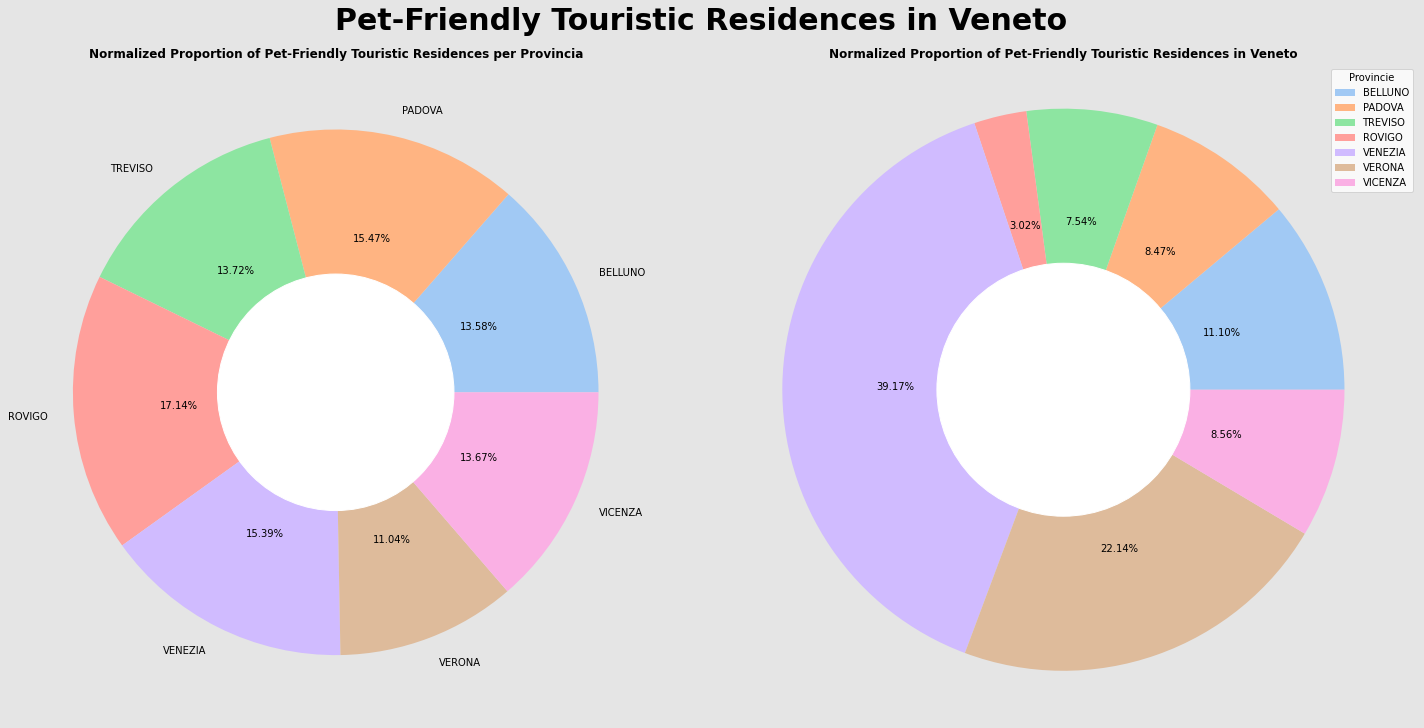

In [220]:
## ANIMAL FRIENDLY
## Definition of Animal Friendly:
## Animal friendly touristic residences are accommodations that are:
## designed and managed to be welcoming and accommodating to both human guests and their animal companions.
## This may include features such as designated pet-friendly rooms or areas, 
## easy access to outdoor spaces for exercise and relief, and possibly even on-site pet services such as grooming or boarding.

## animal friendly pie charts

from sklearn import preprocessing

## 1 normalizing the number of animal-friendly tr

belluno_af_tr = belluno_descriptive.loc['ANIMALI AMMESSI']
padova_af_tr = padova_descriptive.loc['ANIMALI AMMESSI']
treviso_af_tr = treviso_descriptive.loc['ANIMALI AMMESSI']
rovigo_af_tr = rovigo_descriptive.loc['ANIMALI AMMESSI']
venezia_af_tr = venezia_descriptive.loc['ANIMALI AMMESSI']
verona_af_tr = verona_descriptive.loc['ANIMALI AMMESSI']
vicenza_af_tr = vicenza_descriptive.loc['ANIMALI AMMESSI']

af_array_1 = np.array([belluno_af_tr/belluno_tr, padova_af_tr/padova_tr, treviso_af_tr/treviso_tr, rovigo_af_tr/rovigo_tr, venezia_af_tr/venezia_tr, verona_af_tr/verona_tr, vicenza_af_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(af_array_1[np.newaxis])

af_array_2 = np.array([belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr])
normalized_arr_2 = preprocessing.normalize(af_array_2[np.newaxis])

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

data_1 = normalized_arr_1.T
data_2 = normalized_arr_2.T

labels = provincie

axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of Pet-Friendly Touristic Residences per Provincia", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Normalized Proportion of Pet-Friendly Touristic Residences in Veneto", fontweight='bold')

fig.suptitle("Pet-Friendly Touristic Residences in Veneto", fontsize=30, fontweight='bold')

plt.legend(labels, title='Provincie')
plt.axis('equal')
plt.show()

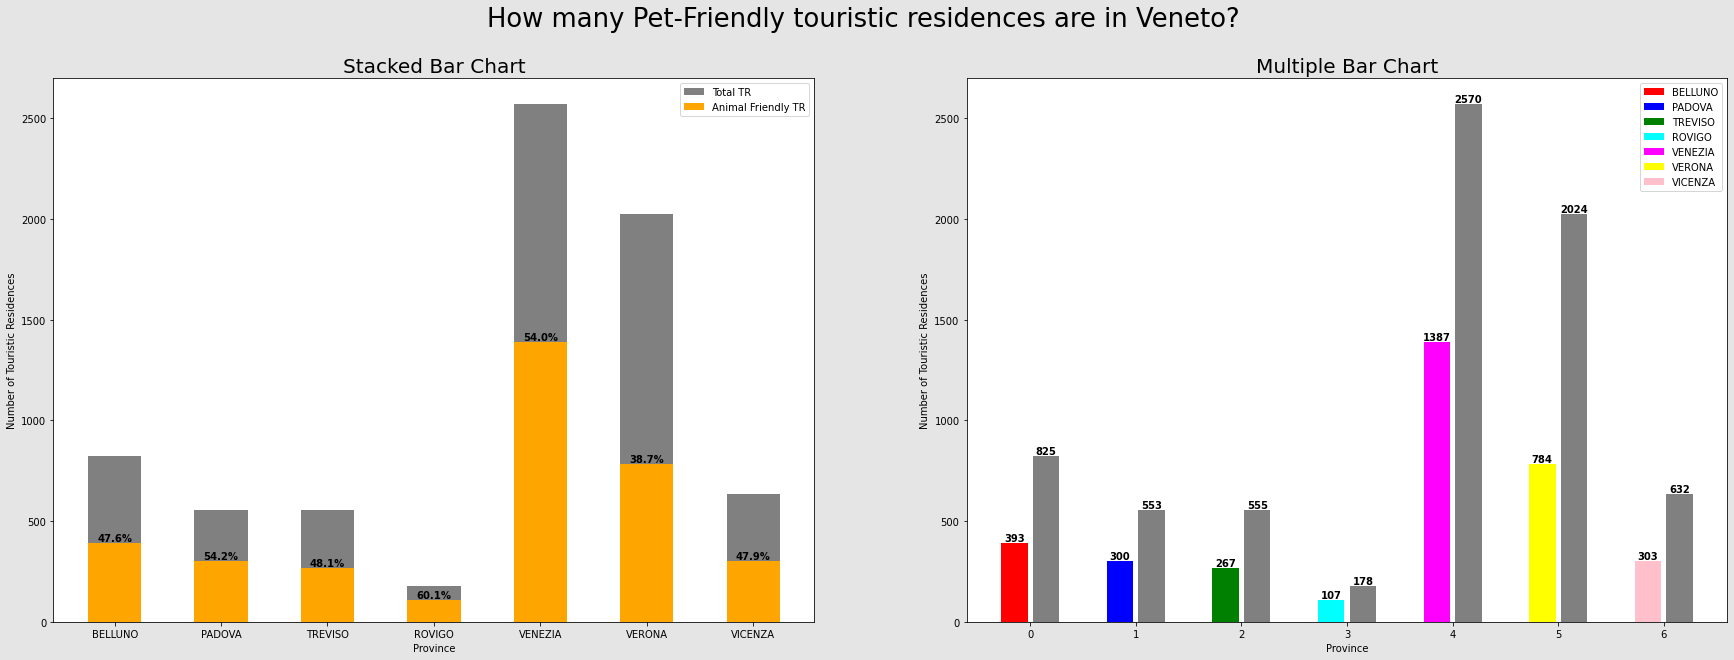

In [217]:
animal_friendly_list=[belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many Pet-Friendly touristic residences are in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Touristic Residences')

for i in range(len(animal_friendly_list)):
    axs[0].bar(provincie[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(provincie[i], animal_friendly_list[i], color='orange', width = 0.5, label='Animal Friendly TR')
    number=round((animal_friendly_list[i]/city_len[i])*100,1)
    axs[0].text(provincie[i], animal_friendly_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

list_of_colors=[
'red',
'blue',
'green',
'cyan',
'magenta',
'yellow',
'pink']

data = [city_len, animal_friendly_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Touristic Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i], label=provincie[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25)
    number=round((animal_friendly_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

plt.show()
